# **Import Libraries dan Data**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('/content/Automobile.csv')

In [ ]:
data.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


# **CLEARING**

In [6]:
data['name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [7]:
data['name'] = data['name'].apply(lambda x: x.split(' ')[0])

In [8]:
data['name'].value_counts()

ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
vw                6
volvo             6
renault           5
saab              4
subaru            4
opel              4
chevy             3
bmw               2
cadillac          2
maxda             2
mercedes-benz     2
triumph           1
vokswagen         1
mercedes          1
hi                1
capri             1
chevroelt         1
toyouta           1
nissan            1
Name: name, dtype: int64

In [9]:
data.replace({'name':{'vw':'volkswagen',
                      'vokswagen':'volkswagen',
                      'chevy':'chevrolet',
                      'chevroelt':'chevrolet',
                      'toyouta':'toyota',
                      'maxda':'mazda',
                      'mercedes-benz':'mercedes'}}, inplace = True)

In [10]:
data = data[~data['name'].isin(['capri', 'hi'])]

# **Plot Categorical Features**

In [11]:
car_origin_count = data.groupby(['name', 'origin'], as_index = False).size().sort_values(by='size', ascending = False)
car_origin_count

,name,origin,size
10,ford,usa,51
5,chevrolet,usa,47
19,plymouth,usa,31
0,amc,usa,28
8,dodge,usa,28
24,toyota,japan,26
7,datsun,japan,23
26,volkswagen,europe,22
3,buick,usa,17
20,pontiac,usa,16


Text(0.5, 1.0, 'Count by Car Name')

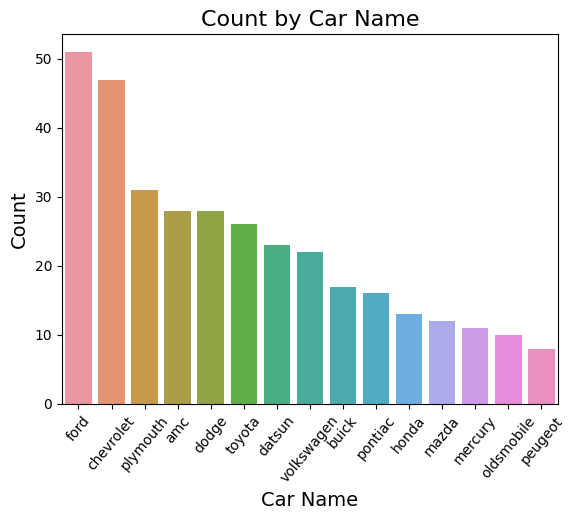

In [12]:
sns.barplot(x=car_origin_count.iloc[0:15, 0], y=car_origin_count.iloc[0:15, 2])
plt.xlabel('Car Name', fontsize=14)
plt.xticks(rotation = 50)
plt.ylabel('Count', fontsize=14)
plt.title('Count by Car Name', fontsize=16)

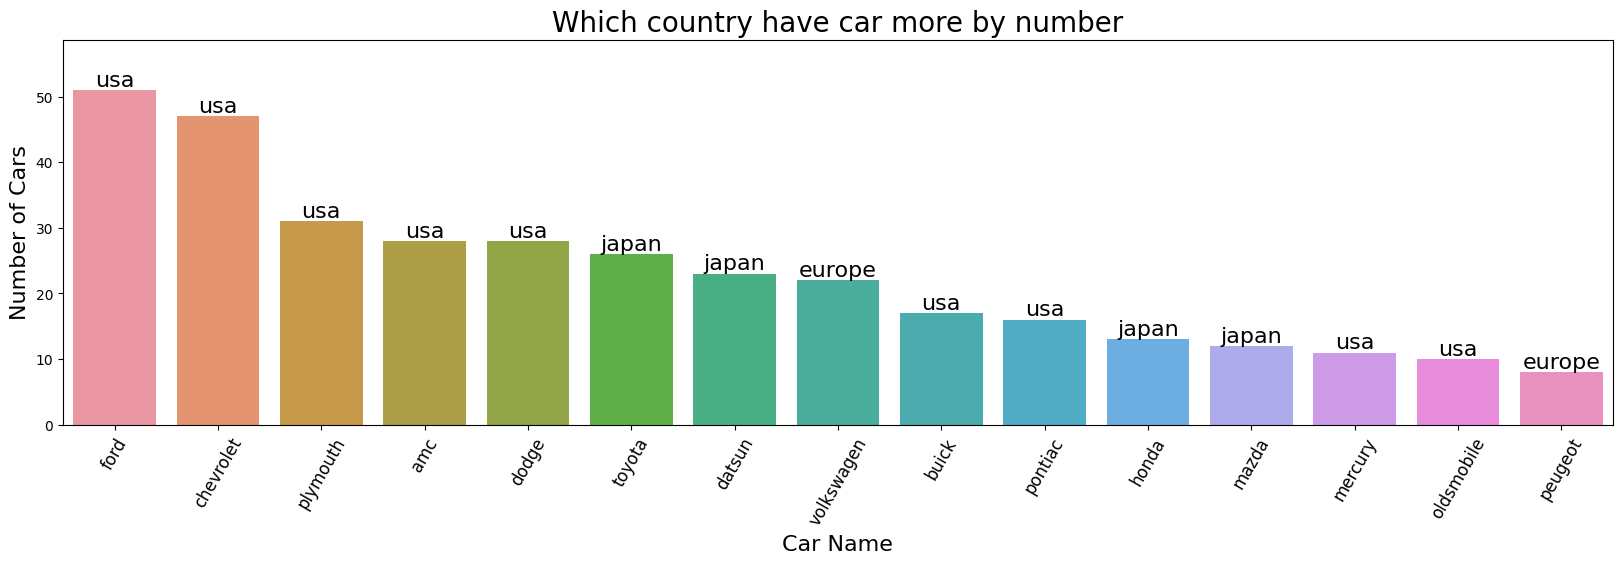

In [34]:
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=car_origin_count.iloc[0:15, 0], y=car_origin_count.iloc[0:15, 2])
plt.xlabel('Car Name', fontsize=16)
plt.ylabel('Number of Cars', fontsize=16)
plt.title('Which country have car more by number', fontsize=20)
plt.xticks(rotation=60,fontsize=12)
plt.margins(y=0.15)

#Annotate the bar plot
labels = car_origin_count['origin'].values
for rect, label in zip(ax.patches, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height , label, ha="center", va="bottom",fontsize=16)

plt.show()



In [17]:
#menghitung jumlah mobil dari tiap negara
origin_count = data.groupby('origin').size().sort_values()

#mengubah nama kolom size
origin_count = origin_count.rename('count').reset_index()
origin_count

,origin,count
0,europe,70
1,japan,79
2,usa,247


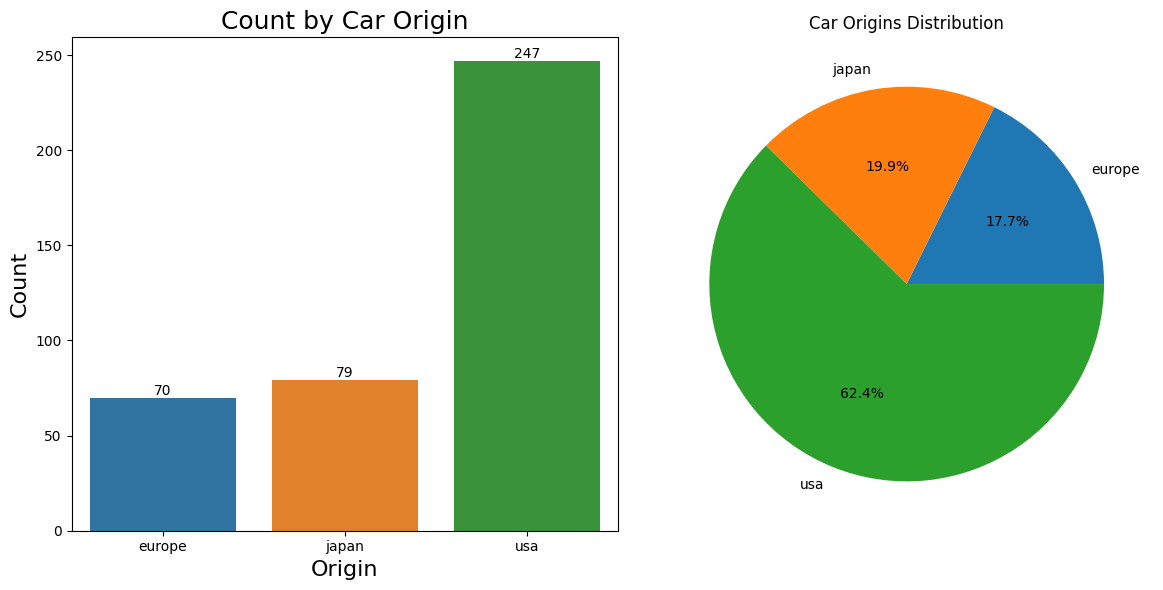

In [18]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the count bar plot
sns.barplot(x='origin', y='count', data=origin_count, ax=ax1)
ax1.set_xlabel('Origin', fontsize=16)
ax1.set_ylabel('Count', fontsize=16)
ax1.set_title('Count by Car Origin', fontsize=18)
ax1.bar_label(ax1.containers[0])

# Plot the pie chart
ax2.pie(origin_count['count'], labels=origin_count['origin'], autopct='%1.1f%%')
ax2.set_title('Car Origins Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Display the combined plot
plt.show()

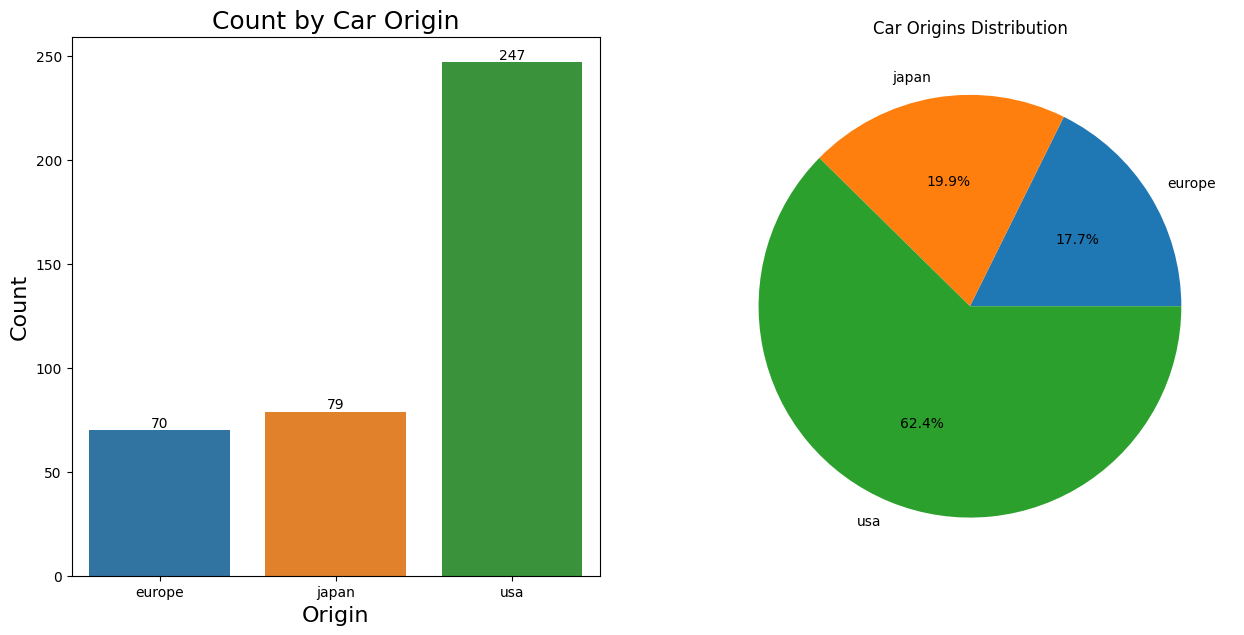

In [19]:
#membuat subplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

#membuat plot bar jumlah
sns.barplot(x='origin', y='count', data=origin_count, ax=ax1)
ax1.set_xlabel('Origin', fontsize=16)
ax1.set_ylabel('Count', fontsize=16)
ax1.set_title('Count by Car Origin', fontsize=18)
ax1.bar_label(ax1.containers[0])

#membuat plot piechart
ax2.pie(origin_count['count'], labels=origin_count['origin'], autopct="%1.1f%%")
ax2.set_title('Car Origins Distribution')

#mengatur spasi diantara subplot
plt.tight_layout

#menampilkan kedua plot
plt.show()

## **Plotting Numerical Features**

In [20]:
def two_plots_num_columns(feature):
  plt.figure(figsize=(11,5))

  plt.subplot(1,2,1)
  plt.title('histogram', fontsize=14)
  sns.histplot(data=data, x=feature, kde=True)

  plt.subplot(1,2,2)
  plt.title('boxplot', fontsize=14)
  sns.boxplot(y=data[feature])

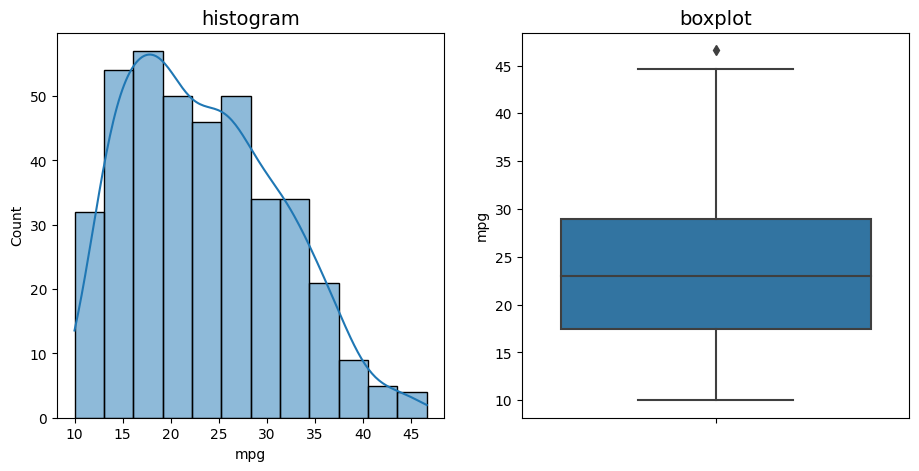

In [21]:
two_plots_num_columns('mpg')

In [22]:
def grouping_features(feature):
  #grouping
  car_by_feature = data.groupby('name', as_index=False)[feature].mean().sort_values(by=feature, ascending=False)

  #plotting
  sns.barplot(x=car_by_feature.iloc[0:20, 1], y=car_by_feature.iloc[0:20, 0])
  plt.xlabel(f'{feature}', fontsize=14)
  plt.ylabel('car name', fontsize=14)
  plt.title(f'{feature} by Car Name', fontsize=14)

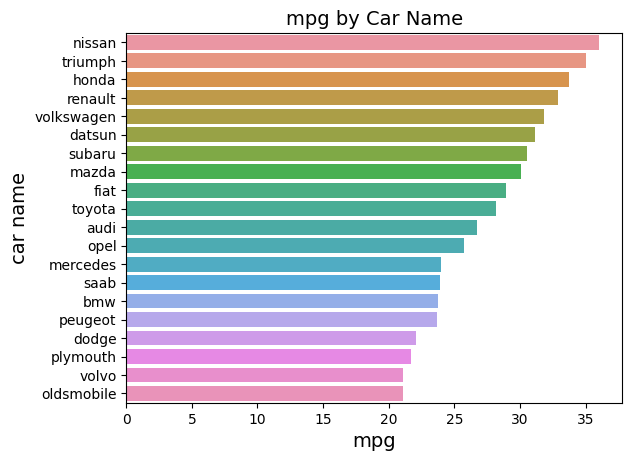

In [23]:
grouping_features('mpg')

# **displacement feature**

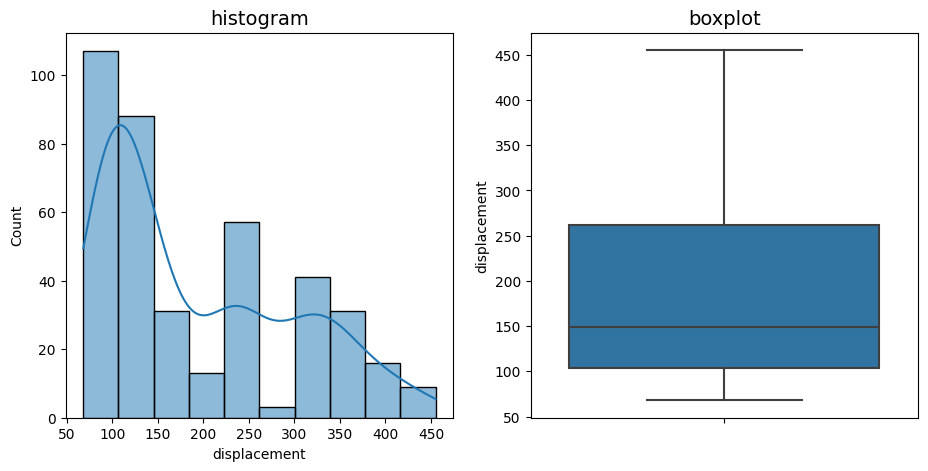

In [24]:
two_plots_num_columns('displacement')

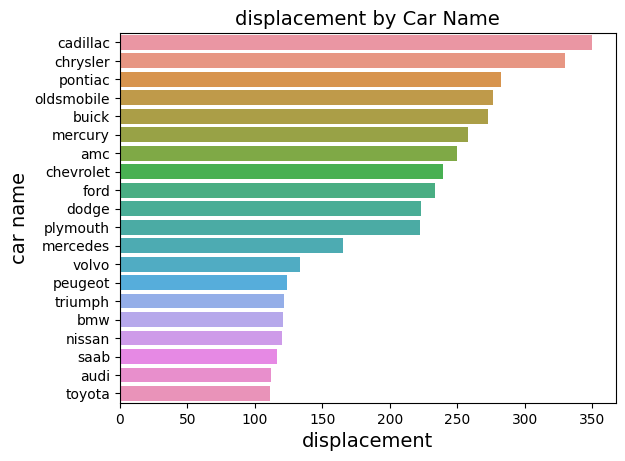

In [25]:
grouping_features('displacement')

# **horsepower feature**

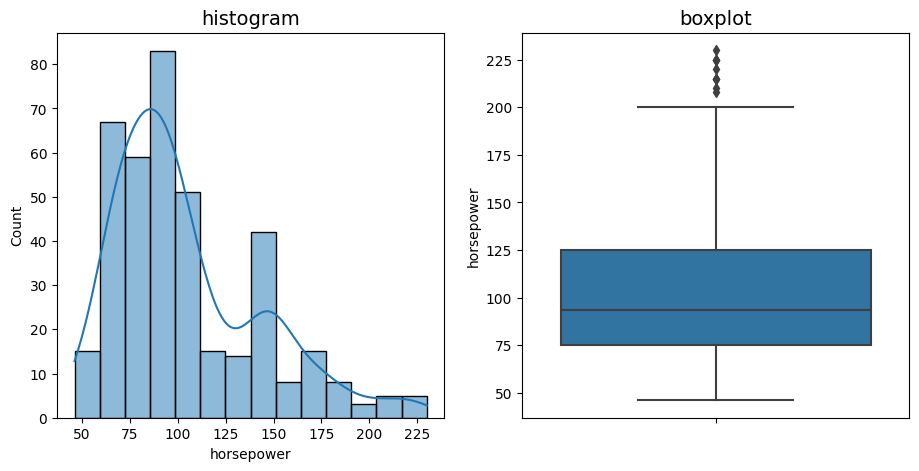

In [26]:
two_plots_num_columns('horsepower')

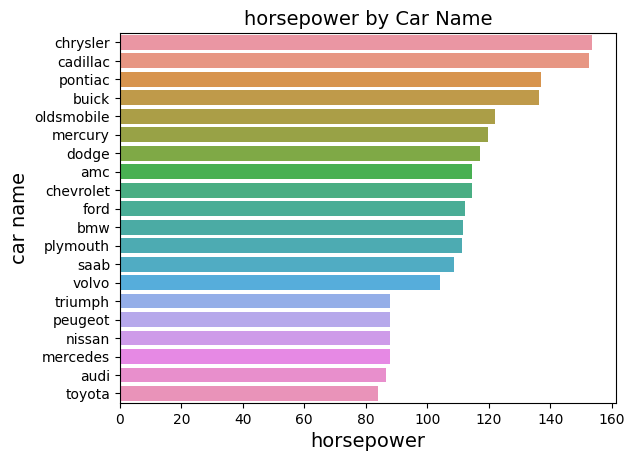

In [27]:
grouping_features('horsepower')

# we**ight feature**

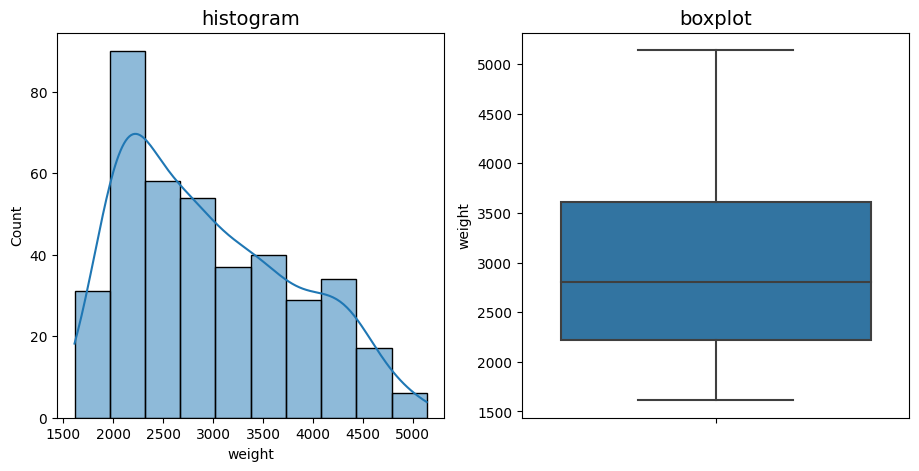

In [28]:
two_plots_num_columns('weight')

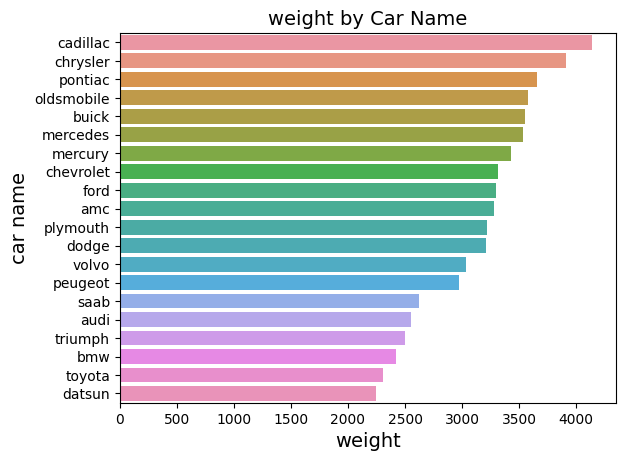

In [29]:
grouping_features('weight')

# **acceleraton feature**

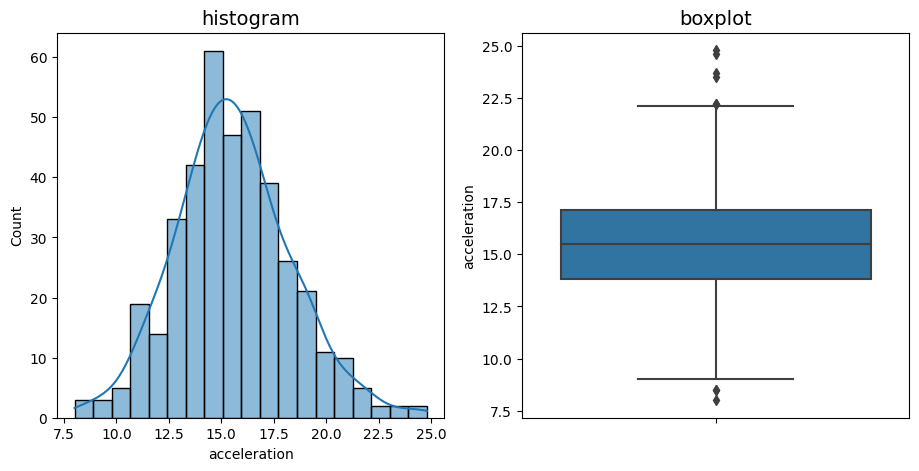

In [30]:
two_plots_num_columns('acceleration')

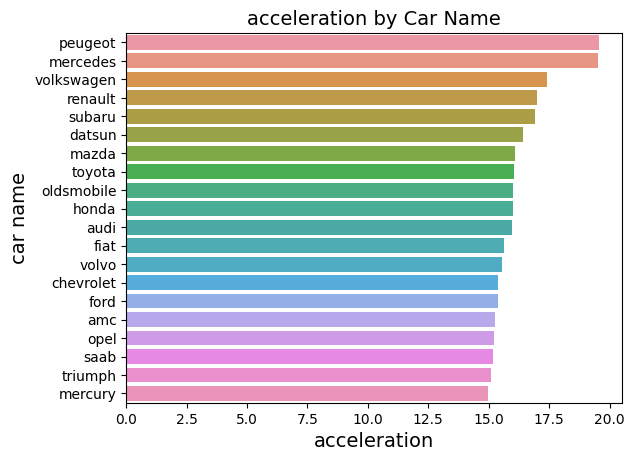

In [31]:
grouping_features('acceleration')

# **model year feature**

Text(0.5, 1.0, 'Model Year')

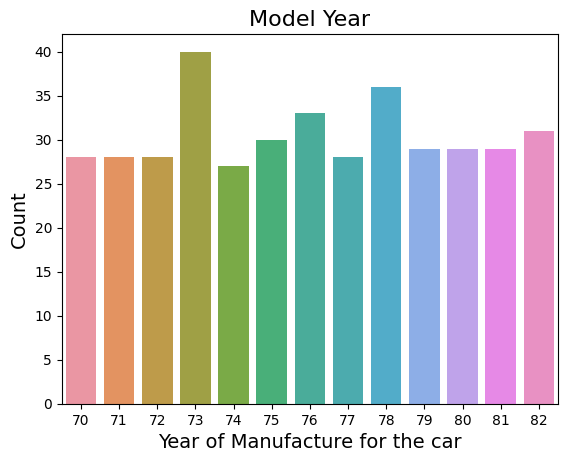

In [32]:
plot = sns.countplot(data=data, x='model_year')
plt.xlabel('Year of Manufacture for the car', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Model Year', fontsize=16)

## **cylinders feature**

Text(0.5, 0, 'Count')

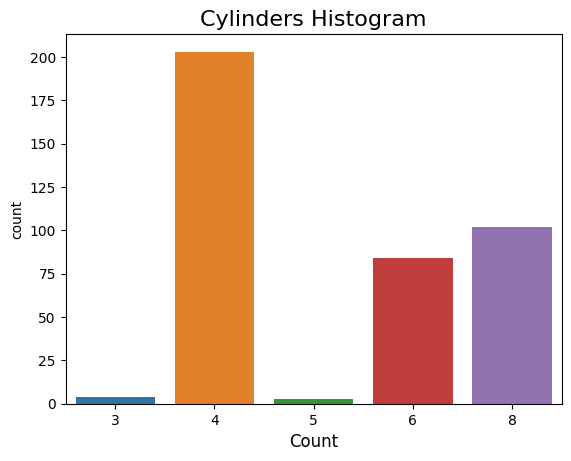

In [33]:
plot = sns.countplot(data=data, x='cylinders')
plt.title('Cylinders Histogram', fontsize=16)
plt.xlabel('Cylinders', fontsize=12)
plt.xlabel('Count', fontsize=12)